Exploratory Data Analysis, known as EDA, is the process of analysing and investigating data in order to test hypothesis and check assumptions, to discover patterns and spot any exceptions. This is achieved by using data visualisations methods and summary statistics.

The Titanic is a well known disaster, a luxury ship that sank after coming into contact with an iceberg in 1912. The story has inspired multiple books and the famously known movie starring Leonardo DiCaprio and Kate Winslet. In this notebook I will begin an exploratory data analysis on the Titanic dataset.

I want to determine the following from my analysis:

The ratio of men and women that did not survive the titanic and those that did, together with thier socio-economic standing and ages.


Import all useful packages. 

In [1]:
import pandas as pd

# From the scipy python library import the statistical functions.
from scipy import stats

# This library enables matplolib statistical graphics look more pleasing
import seaborn as sns

# python library provides the ability to understand the distribution of miissing
# values
import missingno as msno

# The matplotlib library enables us to visualise data through plots.
import matplotlib.pyplot as plt

# Read the countries.csv file into a pandas DataFrame.
# view the head() and tail() of the DataFrame.
titanic_df = pd.read_csv('Titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The titanic dataset consists of 12 columns and 891 rows of different types of data. 

There are 5 object features: Name, Sex, Ticket, Cabin and Embarked.
•	Two of them: Cabin and Ticket are mixed type (numbers+ string)
•	Sex is binary categorical - an individual is recorded as male or female
•	Embarked is categorical: S - Southampton, C = Cherbourg , Q= Queenstown
•	Name is text

There are 6 numeric features: Pclass, Age, PassengerID, SibSp, Parch, Fare.
•	Age and Fare are continuous
•	Pclass is ordinal category - where 1 = Upper class, 2 = Middle class and 3 = Lower class
•	SibSp and Parch are discrete ordinal
•	SibSp - the number of siblings or spouse in relation to the passenger aboard the Titanic.
•	Parch -  the number of parents or children in relation to the individual aboard the ship.
•	Target: Survived is binary categorical - where 1 = Survived and 0 = did not Survive

In [2]:
# find information regarding the data within the titanic DataFrame.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Find the number of missing values in each column of titanic_df.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

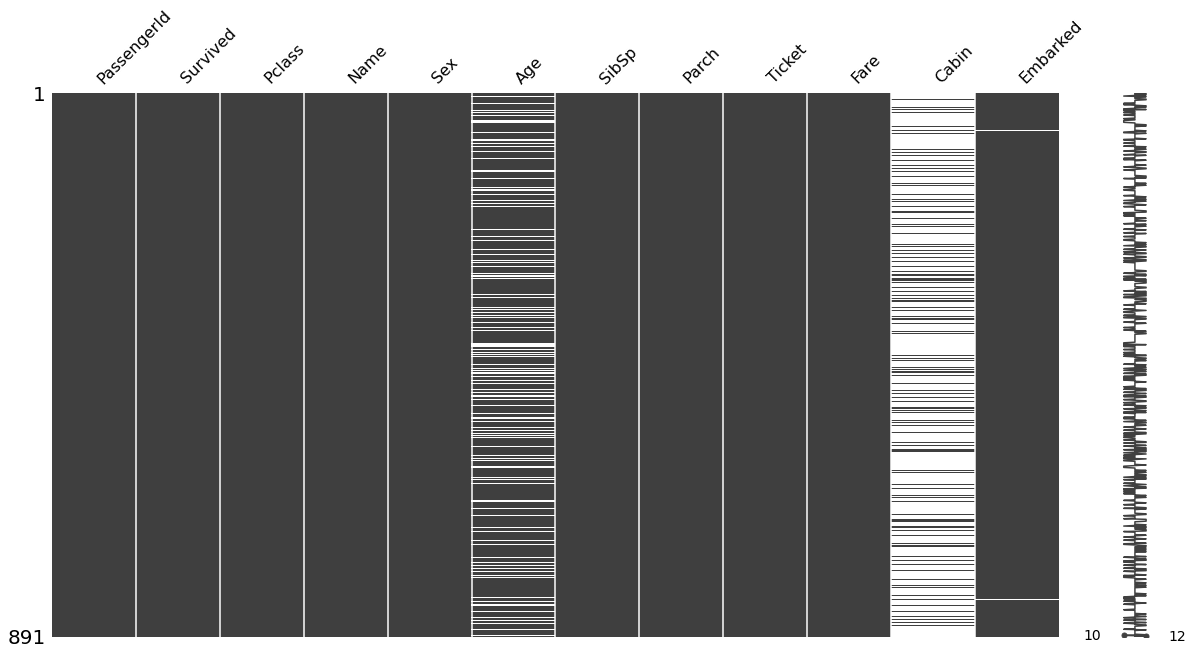

In [3]:
# Visualise the distribution of missing numbers in titanic_df
msno.matrix(titanic_df, figsize = (20,10))

missing_values = titanic_df.isna().sum()
missing_values

The 'Age' , 'Cabin' and 'Embarked' columns contain missing data, with 'Cabin' containing the most missing data, 687 data values are missing. Encylopedia Titanica states that "the only authoritative source of cabin data is the incomplete first class passenger list recovered with the body of steward Herbert Cave". There is no way of knowing what the cabin allocations are and with such few data values it is unlikely to infer any relation between surving the titanic and cabin allocation. I will drop the 'Cabin' column.

In [4]:
# Display the number of unique values in Ticket and Name column
unique_ticket = len(pd.unique(titanic_df['Ticket']))
unique_name = len(pd.unique(titanic_df['Name']))

print('No. of unique tickets: ', unique_ticket)
print('No. of unique names: ', unique_name)

No. of unique tickets:  681
No. of unique names:  891


[Text(0.5, 1.0, 'Correlation matrix of PassengerId and Survived\n')]

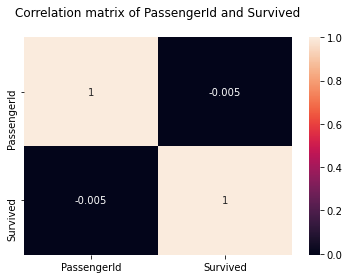

In [5]:
# Display the correlation between PassengerId and Survived by 
# plotting a correlation heatmap.

variables_corr = pd.DataFrame({'PassengerId':titanic_df['PassengerId'], 
                               'Survived':titanic_df['Survived'],
                              })

# plot the correlation heatmap
heatmap = sns.heatmap(variables_corr.corr(), annot=True)

# Add a title
heatmap.set(title = 'Correlation matrix of PassengerId and Survived\n')

I will drop the 'Ticket' column becuase the ticket number is not related to any other column within the dataset. It is just a number generated at the time of purchase. The number of unique values is high, hence I will not use the 'Ticket' column in my analysis.

The 'Name' column will be dropped because it does not affect the survival of the individual aboard the Titanic. The number of unique values is also high. More imputations will have to be conducted in order to infer any relation between Name and Survived.

There is no correlation between 'PassengerId' and 'Survived', as can be seen in the heatmap above. PassengerId and Survived have a correlation of 0, which means no distinguishing relationship between the two variables. I will drop the 'PassengerId' for the purpose of this analysis.

In [6]:
# drop columns
new_titanic_df=titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
new_titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


male      577
female    314
Name: Sex, dtype: int64


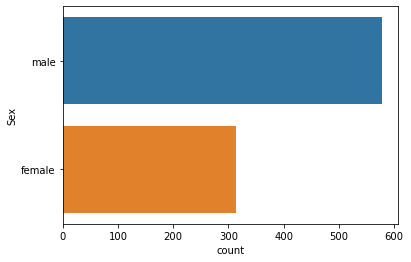

In [7]:
# Visualise the number of males and females aboard
sns.countplot(y='Sex', data=new_titanic_df);
print(new_titanic_df.Sex.value_counts())

There were more males than females aboard the Titanic.

In [8]:
# Replace the 'Survived' values from [0,1] to ['No', 'Yes'] for readibility
new_titanic_df['Survived'].replace({0:'No', 1:'Yes'}, inplace=True)

In [9]:
# count the number of passengers that survided and those that did not
new_titanic_df["Survived"].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

The Titanic disaster has been extensively documented and we know that alot of people did not survive the crash. As we can see from the dataset 549 people did not survive and only 342 survived.

Let us look at the proportion of males and females that survived and did not survive the shipwreck.

Text(0.5, 1.0, 'Number of Titanic passengers that survived or died based on sex\n')

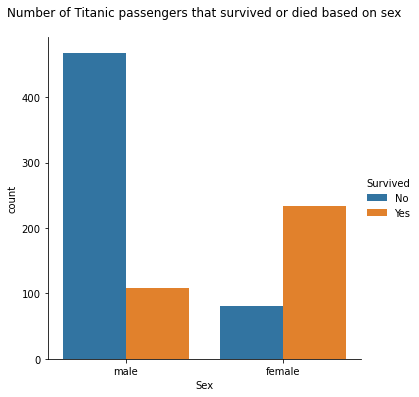

In [10]:
# Plot the number of male and female passengers that did and did not survive.
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = new_titanic_df)
plt.title('Number of Titanic passengers that survived or died based on sex\n')

As we can see more females than males survived the Titanic. When the Titanic crashed it may have been important to the male passengers to help the females first onto the safe boats before the males. The History.com website stated that "in compliance with the law of the sea, women and children boarded the boats first; only when there were no women or children nearby were men permitted to board". 

Let us look at the number of passengers that survived based on class.

Text(0.5, 1.0, 'Number of Titanic passengers that survived or died based on Pclass')

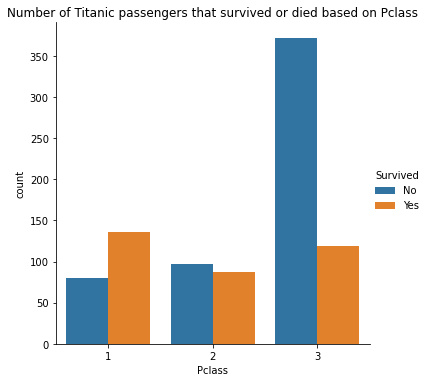

In [11]:
# Plot the number of passengers that survived based on Pclass.
sns.catplot(x ="Pclass", hue ="Survived", kind ="count", data = new_titanic_df)
plt.title('Number of Titanic passengers that survived or died based on Pclass')


The lower class had the most deaths among all three classes. The upper class had a higher number of survivors compared to deaths. There is a close to equal number of pasengers that died and those that survived in the middle class.


Let's have a look at the proportion of males and females that survived based on their class.

Text(0.5, 1.0, 'Number of Passengers that survived based on Sex and Pclass\n')

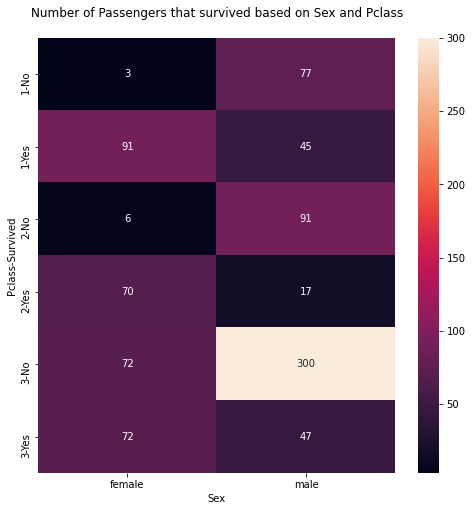

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

# Group the dataset by Pclass, Survived and Sex 
group= new_titanic_df.groupby(['Pclass', 'Survived', 'Sex'])

# and then unstack them
pclass_survived = group.size().unstack()

# Heatmap illustration of the above dataset.
ax = sns.heatmap(pclass_survived, annot = True, fmt ="d")
ax.set_title('Number of Passengers that survived based on Sex and Pclass\n')


The heatmap illustrates the number of males and females that died and survived the Titanic based on the Pclass.
As can be seen 300 male passengers within the lower class did not survive compared to 91 from the middle class and 77 from the upper class. 

What is interesting to see is the high number of males that died compared to the ones that survived in the lower class. Whereas, for females in the lower class there was an equal amount of deaths and survivors.

In all the classes the number of females that survived is again higher than males.
Let's look at the number of passengers that survived based on the town they embarked from.

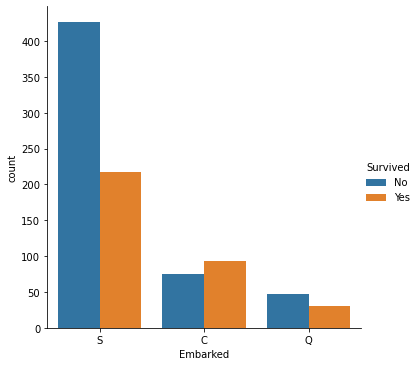

In [13]:
# Plot the survival of passengers based on the town they embarked from.
sns.catplot(x ="Embarked", hue ="Survived", kind ="count", data = new_titanic_df)

Most passengers embarked from Southamptom compared to Cherbourg and Queenstown. There is a high number of passengers that did not survive from Southampton and Queenstown has the least amount of passengers that survived. Only passengers that embarked from Cherbourg had a greater 

<AxesSubplot:xlabel='Pclass', ylabel='Embarked-Survived'>

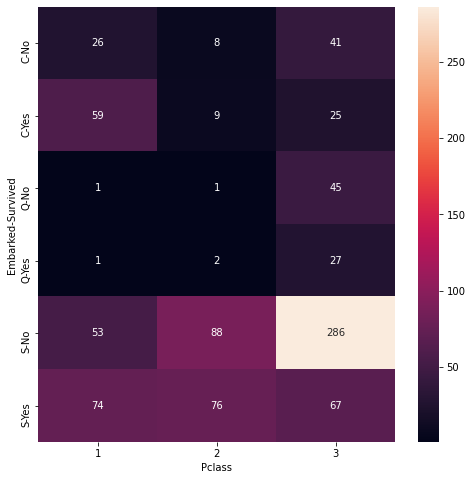

In [14]:
# group the dataset by Embarked, Survived, Pclass 
embarked_group = new_titanic_df.groupby(['Embarked', 'Survived', 'Pclass'])

# reshape the DataFrame using the unstack() function.
embarked_survived = embarked_group.size().unstack()


plt.figure(figsize=(8,8))
# Heatmap illustration of the above dataset.
sns.heatmap(embarked_survived, annot = True, fmt ="d")

The heatmap above shows that the most passengers that did not survive are from the lower class and embarked from Southampton. Both the upper and middle classed passengers from Queenstown had equal numbers of deaths and close to equal numbers of survivors. The upper class from Cherbourg and Southampton and the middle class from Southampton had among the highest number of survivors.

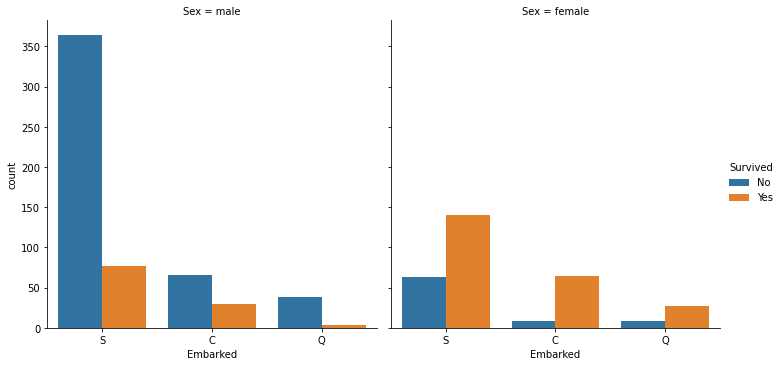

In [15]:
# Use the code below for age ranges. 
sns.catplot(x='Embarked', hue='Survived', kind = 'count', col = 'Sex', data=new_titanic_df)

The overall view of the plot above shows again that the survivors consisted of mostly women. 

Let's explore the Fare amount to Survived. 

<Figure size 2160x1440 with 0 Axes>

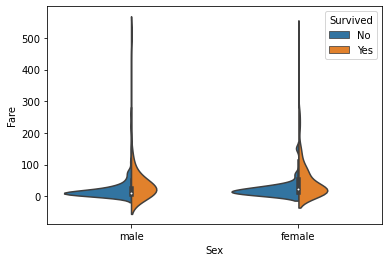

<Figure size 2160x1440 with 0 Axes>

In [31]:
# Plot the survival of passengers based on Fare.
sns.violinplot(x ='Sex', y='Fare', hue='Survived', data = new_titanic_df, split=True)
plt.figure(figsize=(30,20))

In [29]:
new_titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The mean Fare is 32, with 75% of the passengers paying 31 or below for the Fare. The violin plot indicates a higher probability of not surviving for men and women if the Fare is 31. 

Let's explore the effect of travelling with family had on the survival of an individual.

The SibSp and Parch variables separately need further investigation in order to infer any relationship to Survived. However, SibSp and Parch make up close family relations to the individual aboard the Titanic. Hence I will define a new column Family that is obtained from the sum of SibSp and Parch. I will also need a new column Alone for all the passengers that did not travel with SibSp or Parch.

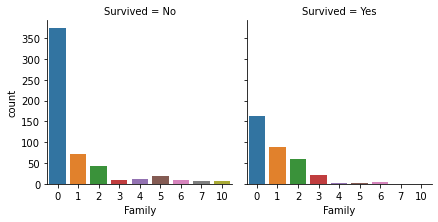

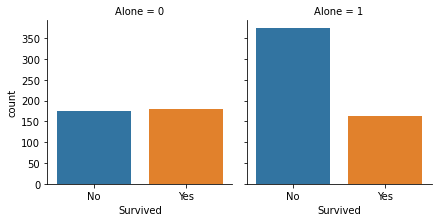

In [17]:
# Define the new Family column
new_titanic_df['Family'] = 0
new_titanic_df['Family'] = new_titanic_df['SibSp']+new_titanic_df['Parch']

# Define the Alone column, 
# if an individual has no Sibling/Parent/Spouse/Child, the data value = 1, else data value = 0
new_titanic_df['Alone'] = 0
new_titanic_df.loc[new_titanic_df.Family == 0, 'Alone'] = 1


# Define 2 factorplots, Family and Alone.
#sns.factorplot(x='Survived', y='Family', data=new_titanic_df)
sns.catplot(x='Family', col ='Survived', data=new_titanic_df, kind='count', height=3)

sns.catplot(x='Survived', col='Alone', data=new_titanic_df, kind='count', height=3)
#sns.factorplot(x='Alone', y='Survived', data= new_titanic_df)


The plots above indicated a high number of passengers that were alone, had no sibling/parent/child/spouse aboard Titanic, died. 
Passenger that did travel with family had an equal chance of surviving or dying. The plots also indicate that the number of survivors is high when a passenger has one family member. This number of survivors gradually decreases if a passenger has more than 1 family member.

The 'Age' column contains 177 missing values, missing at random data. It is difficult to analyse the dataset and develop insights with such a big amount of data missing. This column is important for our analysis. I will 

In [18]:
# Fill in the missing values with the median of the group with the same characteristics
new_titanic_df['Age'] = new_titanic_df['Age'].fillna((new_titanic_df['Age'].median()))

# change the dtype of Age to an integer.
new_titanic_df['Age']= new_titanic_df['Age'].astype(int)

# Find the number of missing values in the transformed Age column.
missing_values = new_titanic_df.Age.isna().sum()
missing_values

0

<Figure size 1440x1440 with 0 Axes>

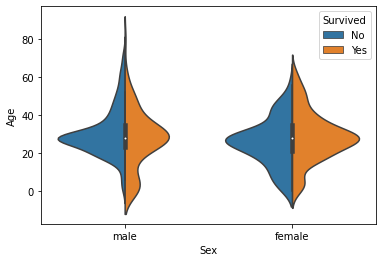

<Figure size 1440x1440 with 0 Axes>

In [23]:
# Violin plot display the
sns.violinplot(x='Sex', y='Age', hue='Survived', data=new_titanic_df, split=True)
plt.figure(figsize=(20,20))

Violin plots depict summary statistics and the density of each variable. There is a high probablity that women and men between the ages of 20 and 40 did not survive. The probability of surviving for women between the ages of 18 to 10 is much higher than for men in the same age group.

In conclusion, there were more female survivors than male overall. Most passengers that did not survive are from the lower class and embarked from Southampton. Most passengers paid a fare of 31 or lower, both male and female passengers had a high probability of not surviving if they paid a low fare. The number of survivors is high when a passenger has one family member but this number gradually decreases if a passenger has more than 1 family member.

Bibliography

HISTORY. 2021. Titanic. [online] Available at: <https://www.history.com/topics/early-20th-century-us/titanic> [Accessed 3 February 2022].

Encyclopedia-titanica.org. 2004. Cabin Allocations. [online] Available at: <https://www.encyclopedia-titanica.org/cabins.html> [Accessed 3 February 2022].

Campus.lakeforest.edu. n.d. [online] Available at: <http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf> [Accessed 3 February 2022].

GeeksforGeeks. n.d. Python | Titanic Data EDA using Seaborn - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/> [Accessed 3 February 2022].